In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns

# Interactions model analysis

In [2]:
sns.set(rc={'text.usetex' : True})

In [3]:
BASE_DATA_PATH = Path("../../../../ilmart-data/")
df = pd.read_csv(BASE_DATA_PATH / "inter/eval.csv", index_col=0)
df

,dataset,budget,n_feature_used,ndcg,cutoff,main_strategy,inter_strategy,subset
0,web30k,30,30,0.484349,1,greedy,greedy,vali
1,web30k,30,30,0.471118,5,greedy,greedy,vali
2,web30k,30,30,0.487711,10,greedy,greedy,vali
3,web30k,30,30,0.478945,1,greedy,greedy,test
4,web30k,30,30,0.469719,5,greedy,greedy,test
...,...,...,...,...,...,...,...,...
6637,istella,45,42,0.672329,5,contrib,contrib,vali
6638,istella,45,42,0.730681,10,contrib,contrib,vali
6639,istella,45,42,0.673651,1,contrib,contrib,test
6640,istella,45,42,0.670386,5,contrib,contrib,test


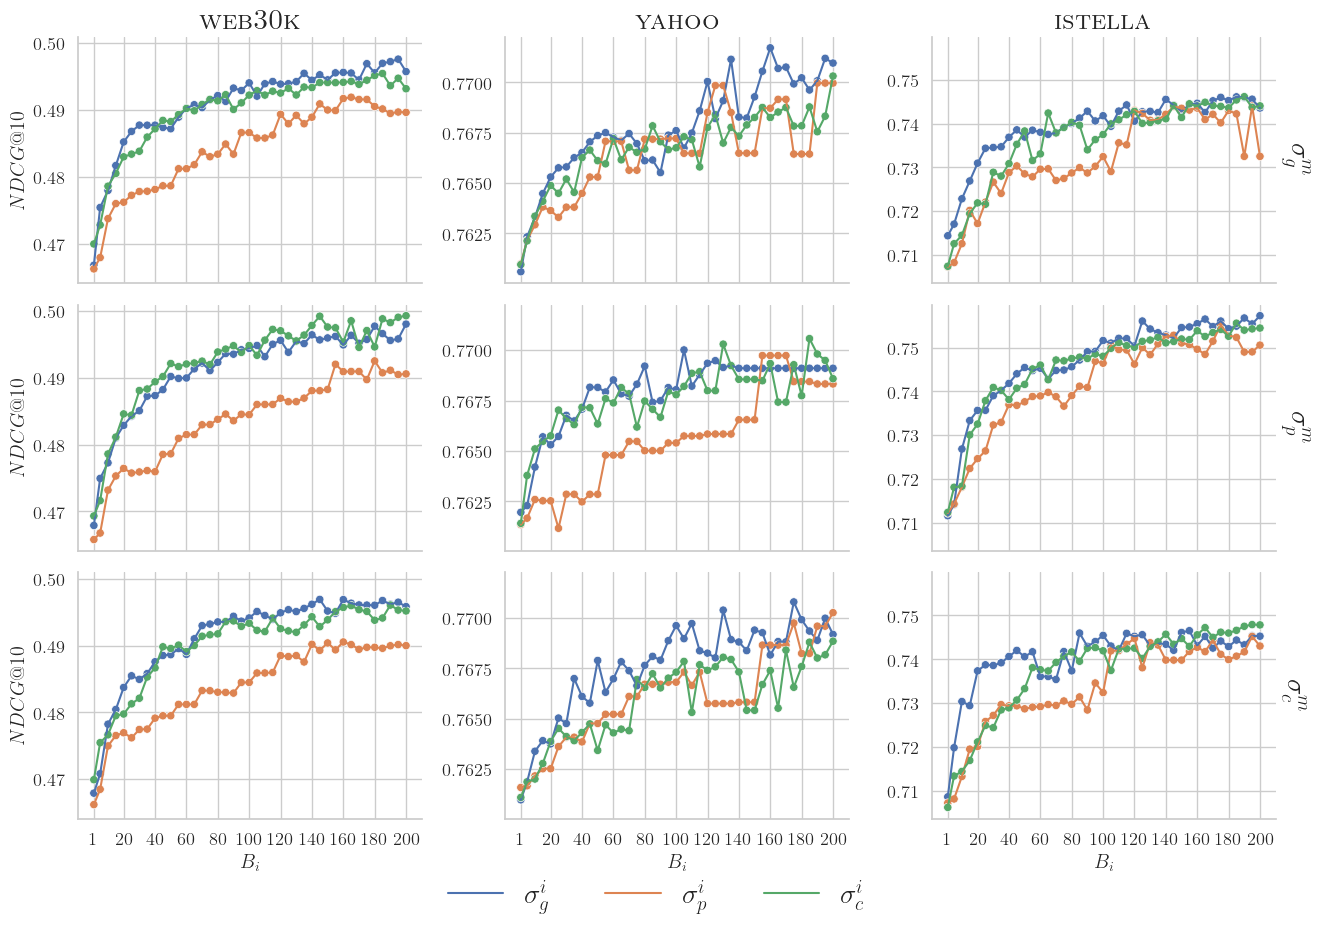

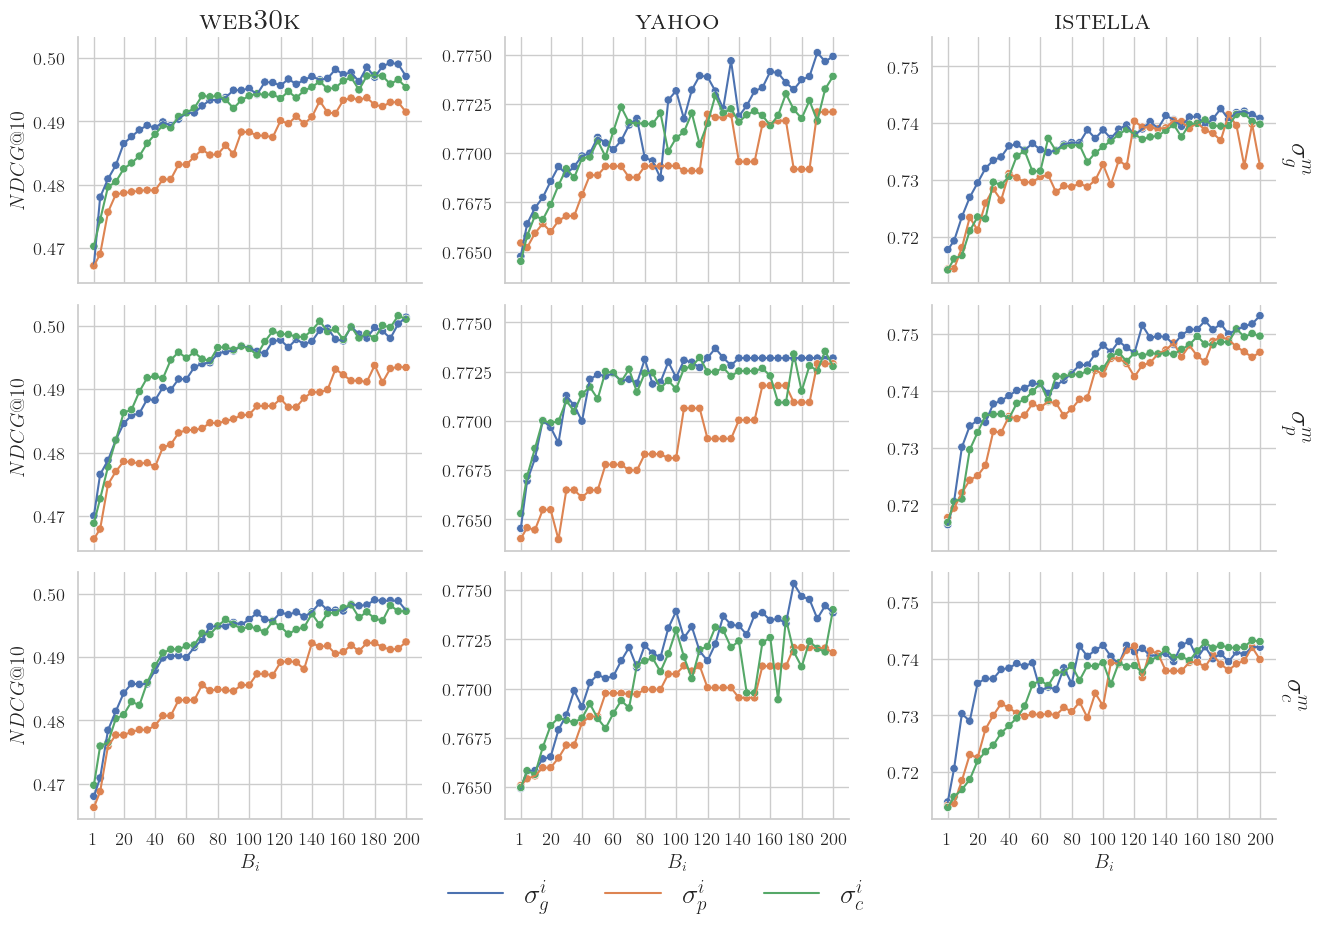

In [4]:
mapping_label_strategy_main = {"greedy": r"$\sigma_g^m$",
                               "prev": r"$\sigma_p^m$",
                               "contrib": r"$\sigma_c^m$"}
mapping_label_strategy_inter = {"greedy": r"$\sigma_g^i$",
                               "prev": r"$\sigma_p^i$",
                               "contrib": r"$\sigma_c^i$"}
df_ndgc_10 = df[df["cutoff"] == 10]
sns.set(font_scale=1.2)
sns.set_style("whitegrid")
for subset in ["vali", "test"]:
    df_to_plot = df_ndgc_10[(df_ndgc_10["subset"] == subset)].copy()
    df_to_plot["inter_strategy"] =  df_to_plot["inter_strategy"].map(mapping_label_strategy_inter)
    df_to_plot["main_strategy"] =  df_to_plot["main_strategy"].map(mapping_label_strategy_main)
    g = sns.FacetGrid(df_to_plot, col="dataset", row="main_strategy", sharey="col", sharex=True, aspect=1.5, margin_titles=True)
    g.map_dataframe(sns.scatterplot, x="budget", y="ndcg", hue="inter_strategy")
    g.map_dataframe(sns.lineplot, x="budget", y="ndcg", hue="inter_strategy")
    g.add_legend()
    g.set(xticks=[1] + list(np.arange(20, 201, 20)))
    g.set_xlabels("$B_i$")
    g.set_ylabels("$NDCG@10$")
    g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template=r"{row_name}", size=20)
    sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(0.47, -0.05), fontsize=20)

    plt.savefig(f"./plots/inter_{subset}.pdf", bbox_inches='tight')

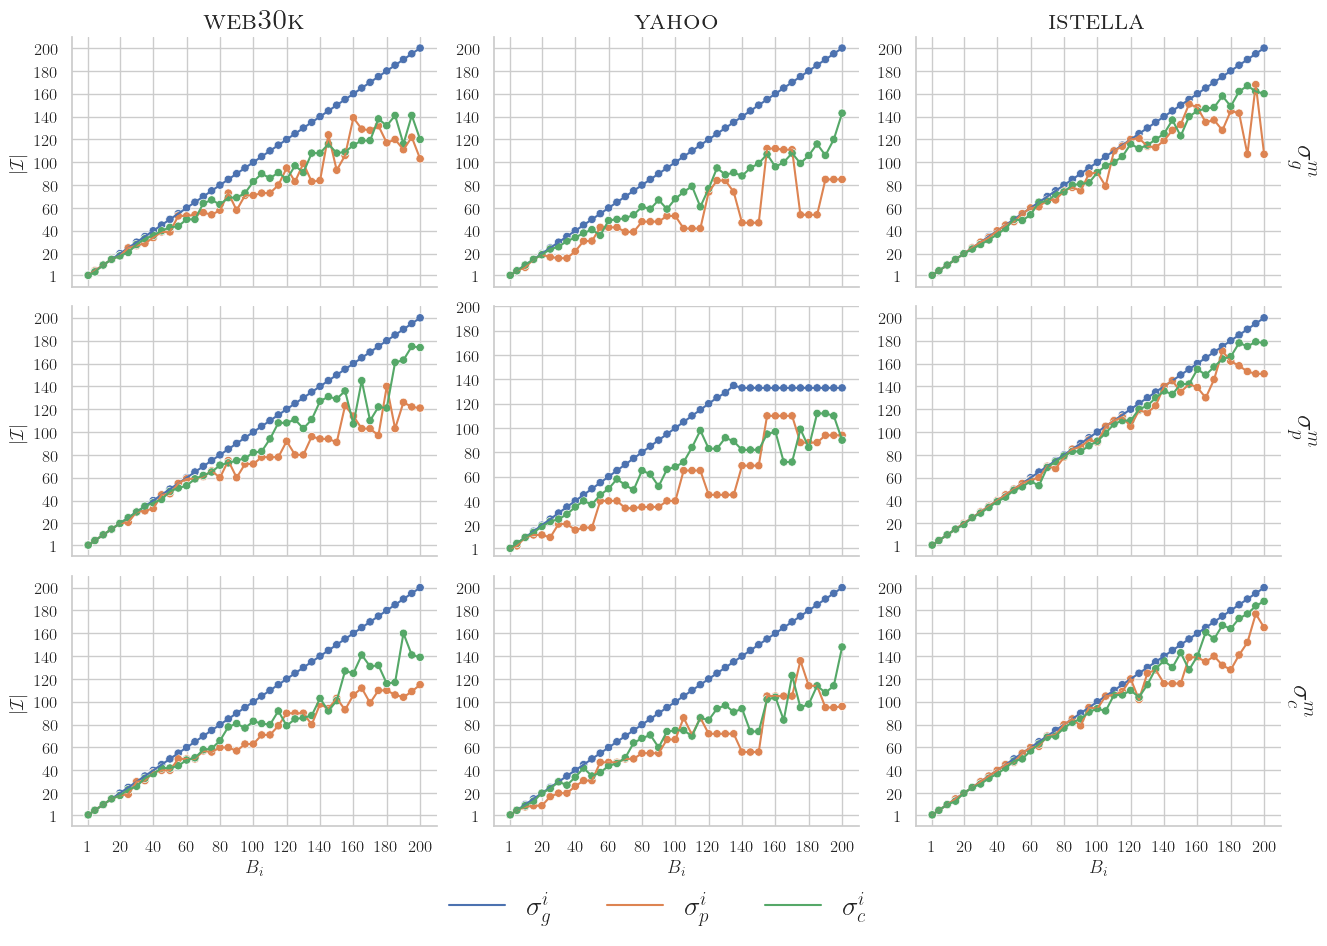

In [5]:
df_to_plot = df[(df["subset"] == "vali") & (df["cutoff"] == 1) ].copy()
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
df_to_plot["inter_strategy"] =  df_to_plot["inter_strategy"].map(mapping_label_strategy_inter)
df_to_plot["main_strategy"] =  df_to_plot["main_strategy"].map(mapping_label_strategy_main)
g = sns.FacetGrid(df_to_plot, col="dataset", row="main_strategy", sharey=False, sharex=True, aspect=1.5, margin_titles=True)
g.map_dataframe(sns.scatterplot, x="budget", y="n_feature_used", hue="inter_strategy")
g.map_dataframe(sns.lineplot, x="budget", y="n_feature_used", hue="inter_strategy")
g.add_legend()
g.set(xticks=[1] + list(np.arange(20, 201, 20)), yticks=[1] + list(np.arange(20, 201, 20)))

g.set_xlabels("$B_i$")
g.set_ylabels(r"$|\mathcal{I}|$")

g.set_titles(col_template=r"\textsc{{{col_name}}}", row_template=r"{row_name}", size=20)
sns.move_legend(g, "lower center", ncol=3, bbox_to_anchor=(0.47, -0.06), fontsize=20)
plt.savefig(f"./plots/inter_feat_used.pdf", bbox_inches='tight')